In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color blind friendly palette  (https://gist.github.com/thriveth/8560036)
plt.style.use('tableau-colorblind10')  
plt.style.library['tableau-colorblind10'] 

RcParams({'axes.prop_cycle': cycler('color', ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']),
          'patch.facecolor': '#006BA4'})

# DATA ANALYSIS. SURVEYS VOTES. SOCIO-DEM

In this notebook, we conduct a detailed statistical analysis of the survey responses. Specifically, the statistics of the 5 places (neighbourhoods or cities from Barcelona metropolitan area) in which the thermal walks took place. In particular, we study the socio-demographic profiles of the responses and some interesting socioeconomic parameters that characterize each place (level of education, etc.)

We use the dataset **all_surveys(votes).csv**: This dataset contains one row per vote (i.e., a TSV/TCV/wTCV response), along with the corresponding sociodemographic information of the respondent. Note: Since participants provided responses at multiple stops, individual participants may appear more than once.

- Sant Pere, Santa Caterina i la Ribera (Barcelona) --> SP 
- El Congrés i els Indians (Barcelona) --> CI
- Collblanc-La Torrassa (L’Hospitalet de Llobregat) --> CT
- Montcada i Reixac --> MR
- Sant Vicenç dels Horts --> SV


### INDEX

<br>

1. Socio-demographic statistics for each place

        1.1. General statistics
        
        1.2. Statistics for each sociodemographic group
            1.2.1. Gender
            1.2.2. Age
            1.2.3. Neighbourhood knwoledge
            1.2.4. Spent time in public space
        
        
   
<br>       
       
2. Socioeconomic traits


       
        
       
        

## 0. Read data-sets

In [5]:
# Read csv data (please, write the correct directory adress where the data is located in your computer)
df_votes = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(votes).csv')  # votes

df_votes['place'].value_counts()

place
L'Hospitalet de Llobregat                   733
Montcada i Reixac                           483
Barri Sant Pere / La Ribera - Barcelona     323
Barri Congrés / Els Indians  - Barcelona    238
Sant Vicençs dels Horts                      90
Name: count, dtype: int64

## 1. Socio-demographic statistics for neigbhourhood knowledge and time spent: TCV, wTCV and TSV


### 1.1. General statistics

place
L'Hospitalet de Llobregat                   733
Montcada i Reixac                           483
Barri Sant Pere / La Ribera - Barcelona     323
Barri Congrés / Els Indians  - Barcelona    238
Sant Vicençs dels Horts                      90
Name: count, dtype: int64

place
L'Hospitalet de Llobregat                   39.3
Montcada i Reixac                           25.9
Barri Sant Pere / La Ribera - Barcelona     17.3
Barri Congrés / Els Indians  - Barcelona    12.7
Sant Vicençs dels Horts                      4.8
Name: proportion, dtype: float64


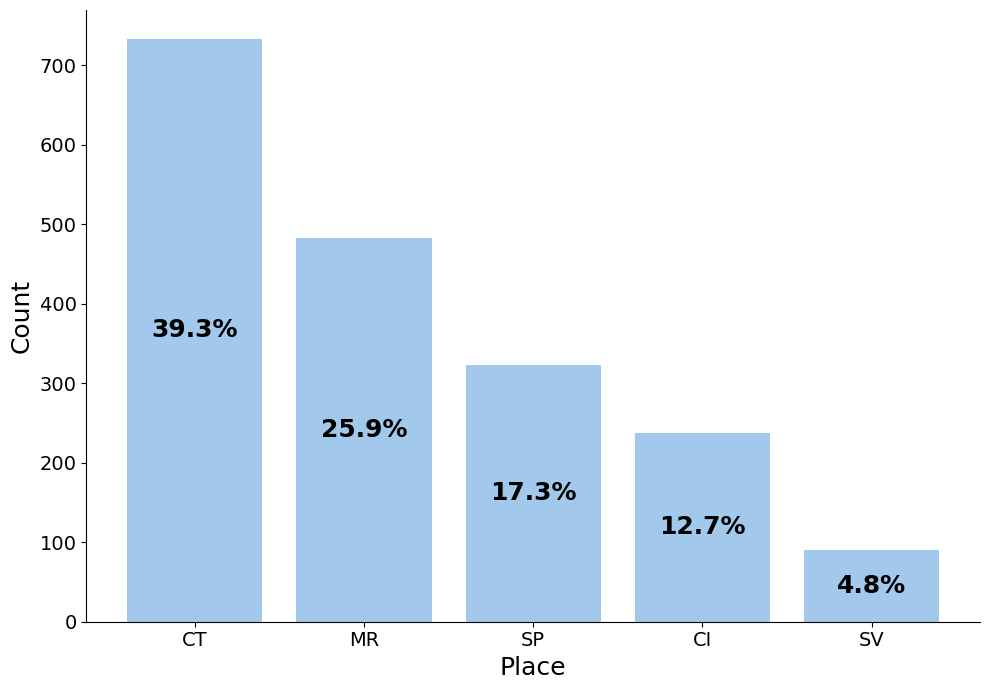

In [6]:
print(df_votes['place'].value_counts())
print('')

print(df_votes['place'].value_counts(normalize=True).mul(100).round(1))


place_order = ['L\'Hospitalet de Llobregat','Montcada i Reixac','Barri Sant Pere / La Ribera - Barcelona',
               'Barri Congrés / Els Indians  - Barcelona', 'Sant Vicençs dels Horts']

# Count the number of occurrences for each neighbourhood group and sort
counts = df_votes['place'].value_counts().reindex(place_order)
total = counts.sum()

place_labels_raw = counts.index.tolist()
place_labels_clean = ['CT', 'MR', 'SP', 'CI', 'SV']  # For display

# Define custom colors for each neighbourhood group (optional, can be changed)
colors = ["#A2C8EC", "#A2C8EC","#A2C8EC","#A2C8EC", "#A2C8EC"]

# Convert counts to percentages and format as strings
percentages = [f'{(count / total) * 100:.1f}%' for count in counts]

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 7))

# Create the bar plot
bars = ax.bar(place_labels_clean, counts, color=colors)

# Add percentage labels centered inside each bar
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, percent,
            ha='center', va='center', color='black', fontsize=18, weight='bold')

# Axis labels and tick styling
ax.set_xlabel('Place', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.tick_params(axis='both', labelsize=14)

# Remove top and right borders for a cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()



### 1.2. Statistics for each sociodemographic group

#### 1.2.1. Gender

In [7]:
columns = ['place']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in df_votes.groupby(['gender']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')

################
place
################

I prefer not to say
-------
place
Montcada i Reixac                           33
L'Hospitalet de Llobregat                    8
Sant Vicençs dels Horts                      5
Barri Congrés / Els Indians  - Barcelona     5
Name: count, dtype: int64

Man
-------
place
L'Hospitalet de Llobregat                   357
Montcada i Reixac                           210
Barri Congrés / Els Indians  - Barcelona    115
Barri Sant Pere / La Ribera - Barcelona     109
Sant Vicençs dels Horts                      46
Name: count, dtype: int64

Non-binary
-------
place
Montcada i Reixac                           11
Barri Sant Pere / La Ribera - Barcelona      5
Barri Congrés / Els Indians  - Barcelona     5
Name: count, dtype: int64

Woman
-------
place
L'Hospitalet de Llobregat                   368
Montcada i Reixac                           229
Barri Sant Pere / La Ribera - Barcelona     209
Barri Congrés / Els Indians  - Barcelona    113
Sant Vicençs dels Ho

#### 1.2.2. Age

In [13]:
columns = ['place']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in df_votes.groupby(['age2']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')

################
place
################

13-15
-------
place
Montcada i Reixac                           427
L'Hospitalet de Llobregat                   131
Barri Sant Pere / La Ribera - Barcelona     120
Barri Congrés / Els Indians  - Barcelona     58
Name: count, dtype: int64

16-24
-------
place
Barri Sant Pere / La Ribera - Barcelona     70
Barri Congrés / Els Indians  - Barcelona    52
L'Hospitalet de Llobregat                   48
Montcada i Reixac                           26
Name: count, dtype: int64

25-54
-------
place
L'Hospitalet de Llobregat                   51
Barri Congrés / Els Indians  - Barcelona    35
Montcada i Reixac                           30
Barri Sant Pere / La Ribera - Barcelona     27
Sant Vicençs dels Horts                      5
Name: count, dtype: int64

55-84
-------
place
Barri Congrés / Els Indians  - Barcelona    53
L'Hospitalet de Llobregat                   47
Name: count, dtype: int64

<12
-------
place
L'Hospitalet de Llobregat                   

#### 1.1.3. Neighbourhood knowledge

In [14]:
columns = ['place']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in df_votes.groupby(['neighbourhood_knowledge2']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')

################
place
################

Good knowledge
-------
place
L'Hospitalet de Llobregat                   241
Montcada i Reixac                           120
Barri Sant Pere / La Ribera - Barcelona      93
Barri Congrés / Els Indians  - Barcelona     42
Sant Vicençs dels Horts                      30
Name: count, dtype: int64

Medium knowledge
-------
place
L'Hospitalet de Llobregat                   187
Barri Sant Pere / La Ribera - Barcelona      73
Barri Congrés / Els Indians  - Barcelona     57
Montcada i Reixac                            47
Sant Vicençs dels Horts                      20
Name: count, dtype: int64

No/Partial knowledge
-------
place
L'Hospitalet de Llobregat                   122
Barri Congrés / Els Indians  - Barcelona     85
Barri Sant Pere / La Ribera - Barcelona      57
Montcada i Reixac                            55
Sant Vicençs dels Horts                      10
Name: count, dtype: int64

Very good knowledge
-------
place
Montcada i Reixac            

#### 1.1.4. Time spent in public space

In [15]:
columns = ['place']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in df_votes.groupby(['spent_time2']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')

################
place
################

1h - 2h
-------
place
L'Hospitalet de Llobregat                   215
Montcada i Reixac                           108
Barri Sant Pere / La Ribera - Barcelona      82
Barri Congrés / Els Indians  - Barcelona     58
Sant Vicençs dels Horts                      15
Name: count, dtype: int64

2h - 4h
-------
place
L'Hospitalet de Llobregat                   191
Montcada i Reixac                           172
Barri Sant Pere / La Ribera - Barcelona      90
Barri Congrés / Els Indians  - Barcelona     79
Sant Vicençs dels Horts                      20
Name: count, dtype: int64

<1h
-------
place
L'Hospitalet de Llobregat                   170
Montcada i Reixac                            72
Barri Sant Pere / La Ribera - Barcelona      54
Barri Congrés / Els Indians  - Barcelona     48
Sant Vicençs dels Horts                      35
Name: count, dtype: int64

>4h
-------
place
L'Hospitalet de Llobregat                   157
Montcada i Reixac             

## 2. Socioeconomic traits

In [16]:
places = ['SP','CI','CT','MR','SV','BCN']
number_inhabitances = [21826, 14350, 25452, 2112, 28422, 1655956]
inhabitance_hectare = [199, 354, 497.671079, 411.410134, 31.164, 163.39]
avg_income_person_eu = [14200, 15870, 12304, 13405, 13586, 17350]
public_greenspace_m2hab = [6.73, 2.93, 2.18, 8.21, 20.28, 7]
popu_education_lower_percent = [26.9, 31.5, 48.1, 72.4, 48.6, 30.1]
popu_education_higher_percent = [73.1, 68.5, 51.9, 27.6, 51.4, 69.9]


df_sociodem_stats = pd.DataFrame()
df_sociodem_stats['place'] = places
df_sociodem_stats['num_inhabit'] = number_inhabitances
df_sociodem_stats['inhabit_hect'] = inhabitance_hectare
df_sociodem_stats['avg_income'] = avg_income_person_eu
df_sociodem_stats['green_space'] = public_greenspace_m2hab
df_sociodem_stats['educ_lower'] = popu_education_lower_percent
df_sociodem_stats['educ_higher'] = popu_education_higher_percent
df_sociodem_stats

,place,num_inhabit,inhabit_hect,avg_income,green_space,educ_lower,educ_higher
0,SP,21826,199.000000,14200,6.73,26.9,73.1
1,CI,14350,354.000000,15870,2.93,31.5,68.5
2,CT,25452,497.671079,12304,2.18,48.1,51.9
3,MR,2112,411.410134,13405,8.21,72.4,27.6
4,SV,28422,31.164000,13586,20.28,48.6,51.4
5,BCN,1655956,163.390000,17350,7.00,30.1,69.9


In [40]:
def sociodemographic_barplot(
    df,
    x_col,
    y_col,
    y_label,
    bcn_reference=None,
    y_tick_step=None,
    y_tick_fmt=None,
    y_lim=None,
    figsize=(10, 7),
    fontsize=24,
    reference_label="BCN",
    facecolor="#A2C8EC",
    edgecolor="black"
):
    """
    Plots a simple bar plot for a sociodemographic variable across places, with an optional horizontal reference line.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the data to plot.

    x_col : str
        Column name to use for x-axis categories (e.g., neighborhoods or places).

    y_col : str
        Column name for the numeric y-axis values (e.g., income, density).

    y_label : str
        Label for the y-axis.

    bcn_reference : float, optional
        Value to draw a reference horizontal line (e.g., city-wide average).

    y_tick_step : int or float, optional
        Custom step size for y-axis ticks.

    y_tick_fmt : function, optional
        Formatter function for y-axis ticks. Example: lambda x, _: f'{int(x/1000)}'.

    y_lim : tuple, optional
        Tuple (min, max) for y-axis limits.

    figsize : tuple, default=(10, 7)
        Size of the figure.

    fontsize : int, default=24
        Font size for axis labels and annotations.

    reference_label : str, default='BCN'
        Text label to show near the reference line.

    facecolor : str, default='#A2C8EC'
        Color of the bars.

    edgecolor : str, default='black'
        Edge color of the bars.

    Returns
    -------
    None
    """
    import matplotlib.ticker as mtick
    
    fig, ax = plt.subplots(figsize=figsize)

    # Bar plot
    sns.barplot(data=df, x=x_col, y=y_col, facecolor=facecolor, edgecolor=edgecolor)

    # Axis labels and formatting
    plt.xlabel("")
    plt.ylabel(y_label, fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize * 0.85)

    if y_tick_step:
        plt.yticks(np.arange(0, y_lim[1] + 1, y_tick_step))

    if y_tick_fmt:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(y_tick_fmt))

    if y_lim:
        plt.ylim(*y_lim)

        
    # Reference line and label
    if bcn_reference is not None:
        plt.axhline(y=bcn_reference, color='black', alpha=0.6, linestyle='--', linewidth=2)
        x_lim = plt.gca().get_xlim()
        
        # Calculate a proportional offset
        offset = 0.01 * (y_lim[1] - y_lim[0])

        # Add the label slightly above the dashed reference line
        plt.text(x_lim[1]-0.2, bcn_reference + offset, reference_label, color='black', alpha=0.6,
                 fontsize=24, verticalalignment='bottom', horizontalalignment='right')


    plt.tight_layout()
    plt.show()

### 2.1. Inhabitance per hectare

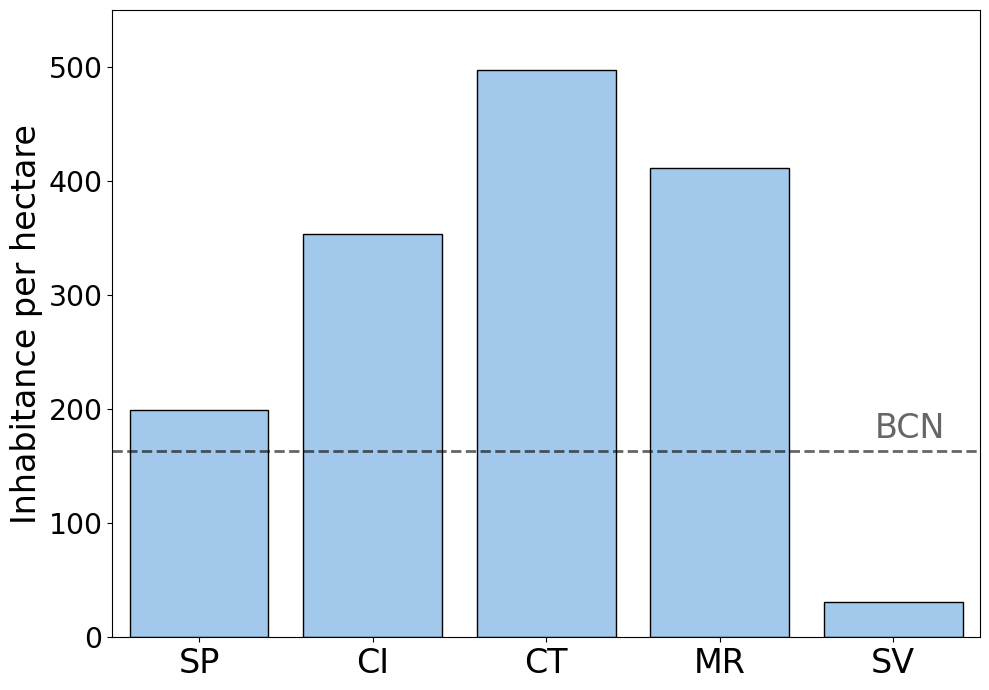

In [41]:
sociodemographic_barplot(
    df=df_sociodem_stats[:-1],               # Exclude 'BCN' if it's the last row
    x_col="place",
    y_col="inhabit_hect",
    y_label="Inhabitance per hectare",
    bcn_reference=df_sociodem_stats['inhabit_hect'][5],  # BCN average
    y_tick_step=100,
    y_lim=(0, 550),
    y_tick_fmt=lambda x, _: f'{int(x)}',     # Show plain integers
    reference_label="BCN"
)


### 2.2. Average income

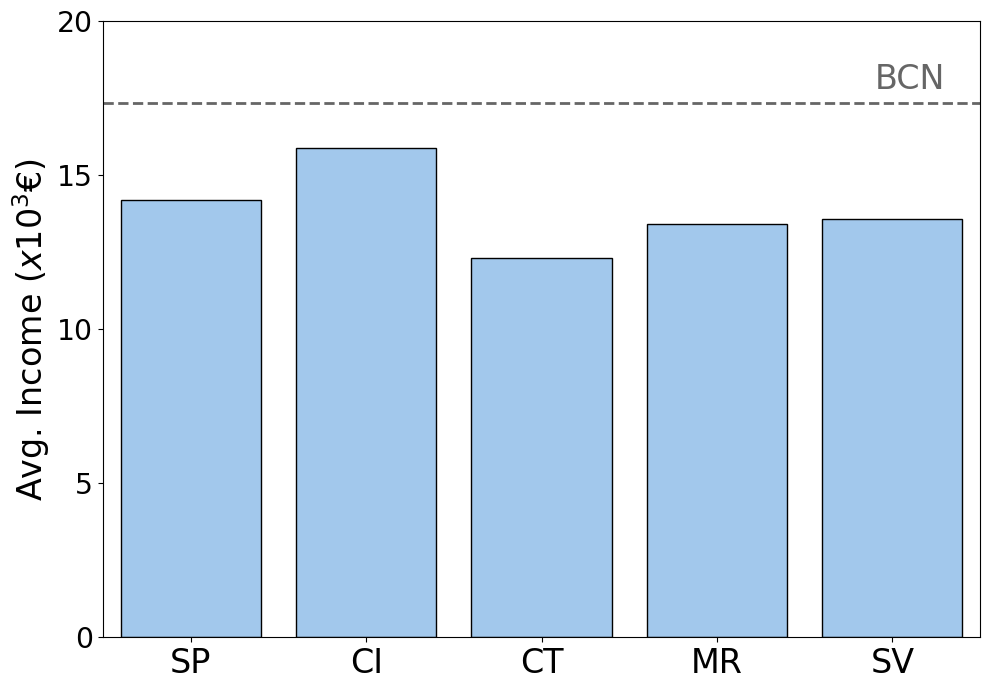

In [42]:
sociodemographic_barplot(
    df=df_sociodem_stats[:-1],  # Exclude the 'BCN' row if it's last
    x_col="place",
    y_col="avg_income",
    y_label=r"Avg. Income $(x10^{3} €)$",
    bcn_reference=df_sociodem_stats['avg_income'][5],  # Reference line for BCN
    y_tick_step=5000,
    y_lim=(0, 20000),
    y_tick_fmt=lambda x, _: f'{int(x/1000)}',  # Format ticks as thousands
    reference_label="BCN"
)


### 2.3. Urban green


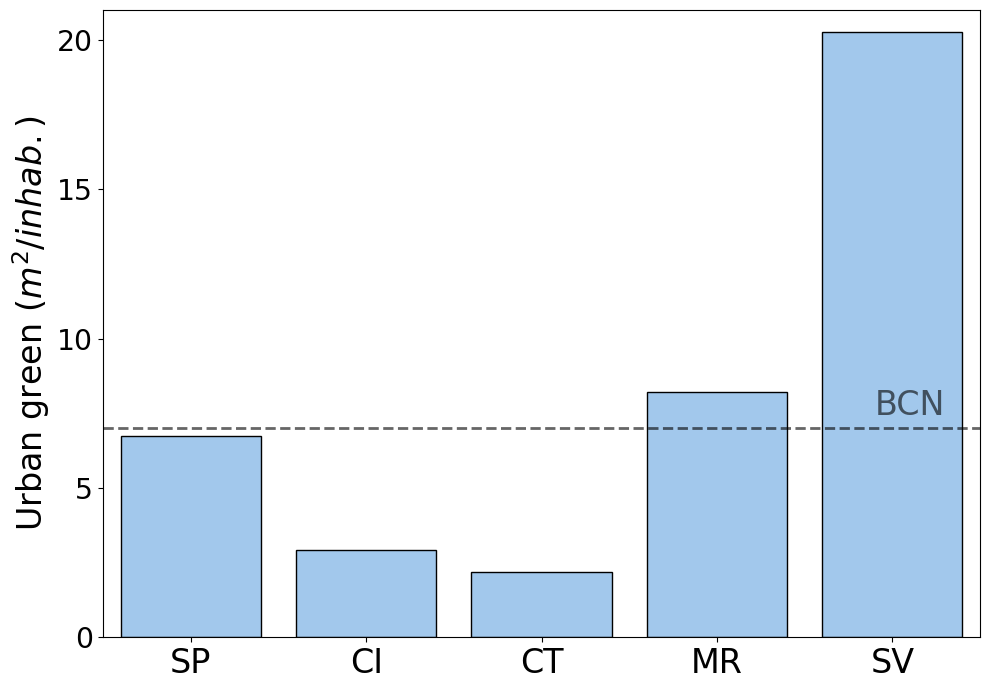

In [43]:
sociodemographic_barplot(
    df=df_sociodem_stats[:-1],               # Exclude 'BCN' if it's the last row
    x_col="place",
    y_col="green_space",
    y_label=r"Urban green $(m^{2}/inhab.)$",
    bcn_reference=df_sociodem_stats['green_space'][5],  # BCN average
    y_tick_step=5,
    y_lim=(0, 21),
    y_tick_fmt=lambda x, _: f'{int(x)}',     # Show plain integers
    reference_label="BCN"
)


### 2.4. Level of higher education

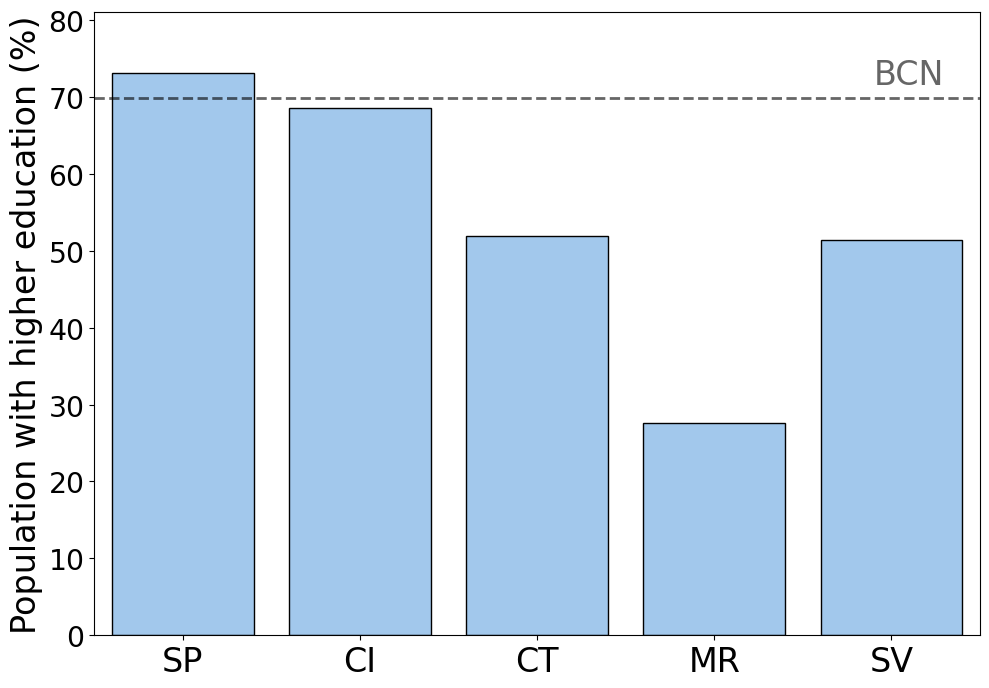

In [45]:
sociodemographic_barplot(
    df=df_sociodem_stats[:-1],               # Exclude 'BCN' if it's the last row
    x_col="place",
    y_col="educ_higher",
    y_label=r"Population with higher education (%)",
    bcn_reference=df_sociodem_stats['educ_higher'][5],  # BCN average
    y_tick_step=10,
    y_lim=(0, 81),
    y_tick_fmt=lambda x, _: f'{int(x)}',     # Show plain integers
    reference_label="BCN"
)
